In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from torch.utils.data import DataLoader
from poc_data import PocDataset, display_sample


NUM_CASES = 2**10

poc_raw_dataset = PocDataset(num_cases=NUM_CASES, generate_meta=True, test_set=True, repays=False)
data_loader = DataLoader(dataset=poc_raw_dataset,
                        batch_size=NUM_CASES,
                        shuffle=False,
                        pin_memory=True)

all_data, all_data_length, all_event, all_meta = next(iter(data_loader))

In [3]:
event_occurences = torch.bincount(all_event.flatten())
length_occurences = torch.bincount(all_data_length.flatten())

print(event_occurences)
print(length_occurences)

tensor([   0,    0, 1024])
tensor([ 0,  0,  0,  0,  0,  0, 99, 87, 94, 77, 68, 57, 48, 57, 51, 44, 41, 35,
        34, 37, 37, 20, 23, 25,  8, 20,  9, 13,  8,  8, 13,  2,  2,  3,  4])


In [4]:
print(all_meta['age'].shape)

torch.Size([1024])


In [5]:
for i in range(10):
    sample_id = int(torch.randint(NUM_CASES, (1,)))
    print("sample %d has length %d, but will experience event %d at time %d" % (sample_id, all_data_length[sample_id], all_meta['ground_truth_event'][sample_id], all_meta['age'][sample_id]))

sample 242 has length 12, but will experience event 0 at time 21
sample 513 has length 22, but will experience event 0 at time 24
sample 381 has length 30, but will experience event 1 at time 33
sample 326 has length 22, but will experience event 0 at time 29
sample 953 has length 16, but will experience event 0 at time 29
sample 748 has length 15, but will experience event 1 at time 19
sample 296 has length 7, but will experience event 1 at time 28
sample 395 has length 13, but will experience event 1 at time 35
sample 48 has length 6, but will experience event 1 at time 30
sample 729 has length 13, but will experience event 0 at time 27


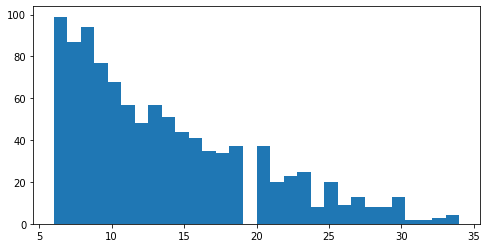

In [6]:
plt.figure(figsize=(8,4))
plt.hist(all_data_length.flatten().numpy(), bins=30);

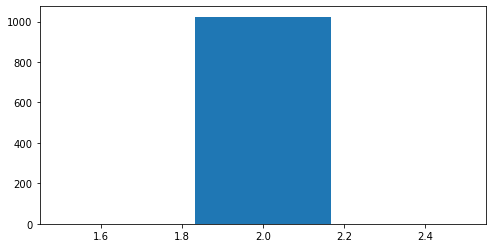

In [9]:
plt.figure(figsize=(8,4))
plt.hist(all_event.flatten().numpy(), bins=3);